In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
df_school = pd.read_csv('./2016_School _Explorer.csv')

In [3]:
df_school.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_school['School Income Estimate']=df_school['School Income Estimate'].str.replace('$','')
df_school['School Income Estimate']=df_school['School Income Estimate'].str.replace(',','')

In [38]:
df_school['School Income Estimate']=df_school['School Income Estimate'].astype('float64')

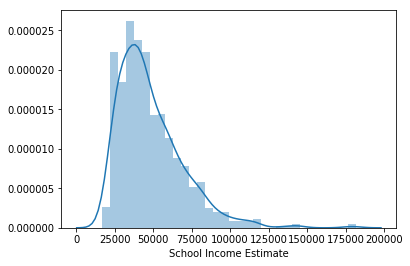

In [44]:
sns.distplot(df_school['School Income Estimate'].dropna())

In [22]:
df_school['New?'].fillna(0,inplace=True)

In [51]:
df_school.loc[df_school['New?']!=0,'New?']=1

In [58]:
df_school.drop(['Adjusted Grade','Other Location Code in LCGMS'],axis=1,inplace=True)

In [64]:
df_school.loc[:5,'Percent ELL':'Rigorous Instruction %']

,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %
0,9%,5%,32%,60%,92%,1%,94%,18%,89%
1,5%,10%,20%,63%,83%,6%,92%,30%,96%
2,15%,35%,8%,49%,57%,4%,94%,20%,87%
3,7%,5%,29%,63%,92%,4%,92%,28%,85%
4,3%,4%,20%,65%,84%,10%,93%,23%,90%
5,6%,7%,19%,66%,84%,7%,92%,33%,93%


In [111]:
list(df_school)
c=[k for k in list(df_school) if 'Percent' in k]
for k in list(df_school):
    if(('%') in k):
        c.append(k)
    if(('Rate') in k):
        c.append(k)
df_school.loc[:,c]=df_school.loc[:,c].apply(lambda x: (x.str.replace('%','')).astype('float64')/100)
df_school.loc[:,c]

AttributeError: ('Can only use .str accessor with string values, which use np.object_ dtype in pandas', u'occurred at index Percent ELL')

In [114]:
df_school.loc[:,c]

,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Percent of Students Chronically Absent,Student Attendance Rate,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
0,0.09,0.05,0.32,0.60,0.92,0.01,0.18,0.94,0.89,0.94,0.86,0.91,0.85,0.94
1,0.05,0.10,0.20,0.63,0.83,0.06,0.30,0.92,0.96,0.96,0.97,0.90,0.86,0.94
2,0.15,0.35,0.08,0.49,0.57,0.04,0.20,0.94,0.87,0.77,0.82,0.61,0.80,0.79
3,0.07,0.05,0.29,0.63,0.92,0.04,0.28,0.92,0.85,0.78,0.82,0.73,0.89,0.88
4,0.03,0.04,0.20,0.65,0.84,0.10,0.23,0.93,0.90,0.88,0.87,0.81,0.89,0.93
5,0.06,0.07,0.19,0.66,0.84,0.07,0.33,0.92,0.93,0.99,0.95,0.91,0.88,0.97
6,0.01,0.16,0.10,0.43,0.53,0.27,0.13,0.95,0.88,0.78,0.95,0.69,0.87,0.78
7,0.12,0.21,0.20,0.55,0.75,0.03,0.36,0.91,0.87,0.89,0.88,0.88,0.79,0.94
8,0.14,0.05,0.13,0.78,0.90,0.03,0.27,0.93,0.94,0.91,0.85,0.87,0.83,0.93
9,0.08,0.06,0.11,0.78,0.90,0.02,0.27,0.92,0.92,0.89,0.90,0.83,0.89,0.95


In [104]:
df_school.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 159 columns):
New?                                                  1272 non-null int64
School Name                                           1272 non-null object
SED Code                                              1272 non-null int64
Location Code                                         1272 non-null object
District                                              1272 non-null int64
Latitude                                              1272 non-null float64
Longitude                                             1272 non-null float64
Address (Full)                                        1272 non-null object
City                                                  1272 non-null object
Zip                                                   1272 non-null int64
Grades                                                1272 non-null object
Grade Low                                             1272 non-null o

In [54]:
df_school.describe()

,New?,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Average ELA Proficiency,Average Math Proficiency,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
count,1272.000000,1.272000e+03,1272.00000,1272.000000,1272.000000,1272.000000,1247.000000,876.000000,1217.000000,1217.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,0.021226,3.286698e+11,16.13522,40.734537,-73.918347,10815.720912,0.672281,48443.128493,2.534215,2.668956,...,43.841195,4.911950,0.003145,0.610063,0.947327,1.984277,0.970912,0.002358,0.159591,2.992138
std,0.144195,1.222022e+10,9.24527,0.086602,0.080576,529.588875,0.210959,21325.180535,0.363589,0.470470,...,82.878780,20.792371,0.068635,3.966083,4.056007,12.841333,6.880223,0.084116,1.321195,12.694124
min,0.000000,3.075000e+11,1.00000,40.507803,-74.244025,10001.000000,0.049000,16901.670000,1.810000,1.830000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.208752e+11,9.00000,40.669499,-73.957057,10452.000000,0.550000,33609.590000,2.250000,2.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.315004e+11,15.00000,40.722995,-73.920571,11203.000000,0.731000,43151.245000,2.450000,2.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.424000e+11,24.00000,40.815632,-73.879264,11232.000000,0.841000,58517.832500,2.760000,2.980000,...,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.531009e+11,32.00000,40.903455,-73.708920,11694.000000,0.957000,181382.060000,3.930000,4.200000,...,652.000000,312.000000,2.000000,107.000000,71.000000,246.000000,126.000000,3.000000,33.000000,196.000000


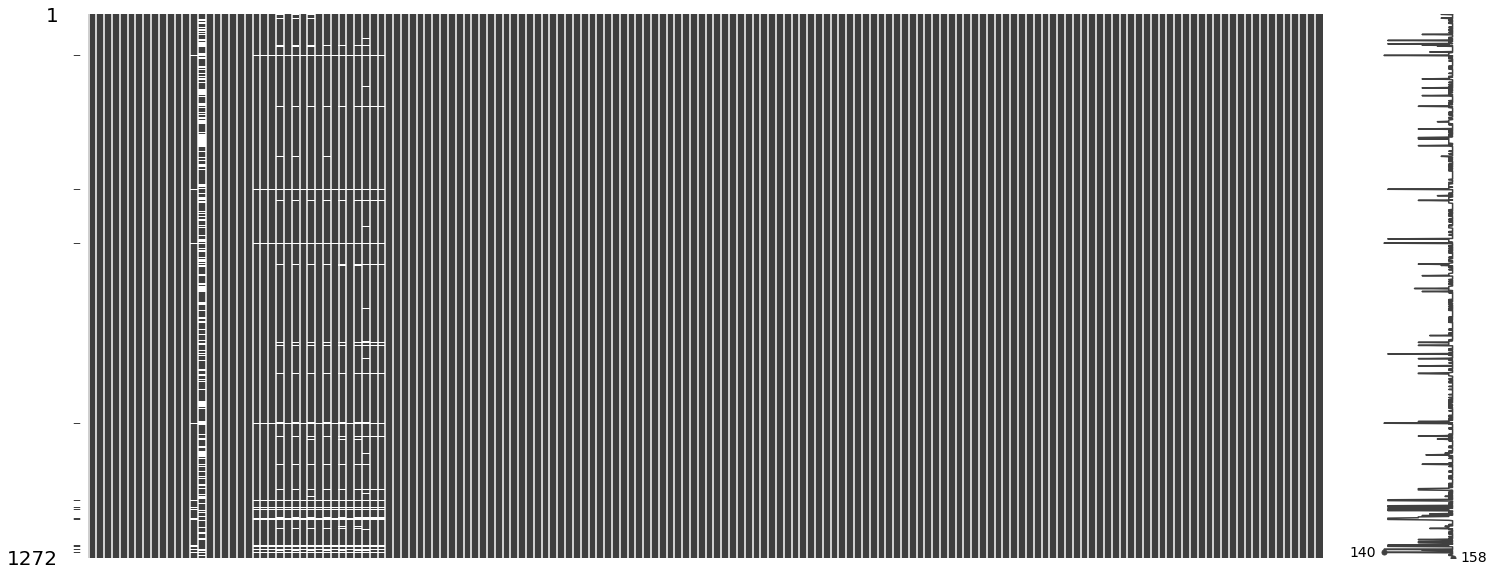

In [7]:
msno.matrix(df_school)

In [108]:
c=[k for k in list(df_school) if 'Rating' in k]
c
school_num=df_school.loc[:,'Economic Need Index':'Grade 8 Math 4s - Economically Disadvantaged']
school_num.drop(c,inplace=True,axis=1)
school_num.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 138 columns):
Economic Need Index                                   float64
School Income Estimate                                float64
Percent ELL                                           float64
Percent Asian                                         float64
Percent Black                                         float64
Percent Hispanic                                      float64
Percent Black / Hispanic                              float64
Percent White                                         float64
Student Attendance Rate                               float64
Percent of Students Chronically Absent                float64
Rigorous Instruction %                                float64
Collaborative Teachers %                              float64
Supportive Environment %                              float64
Effective School Leadership %                         float64
Strong Family-Community 

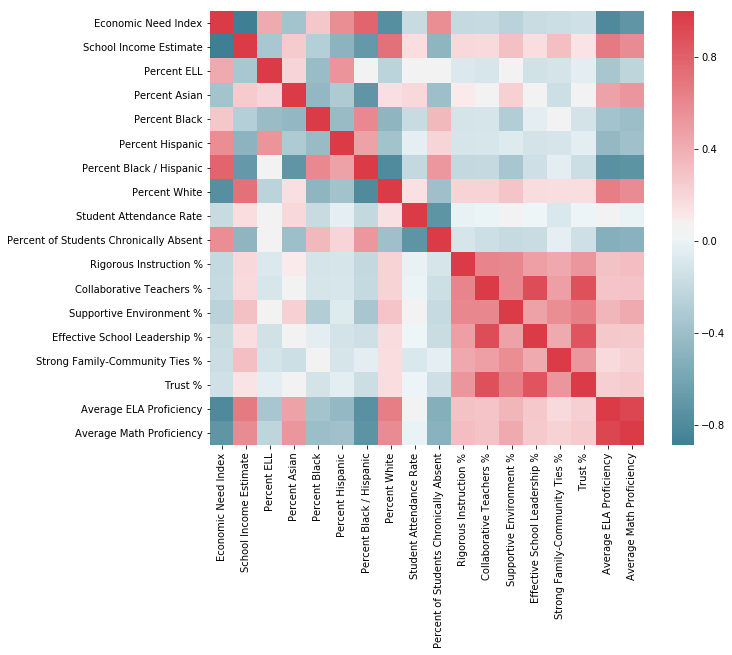

In [113]:
corr=df_school.loc[:,'Economic Need Index':'Average Math Proficiency'].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [156]:
lats = df_school['Latitude'].values
lons = df_school['Longitude'].values
ENI = df_school['Economic Need Index'].values
SIE = df_school['School Income Estimate'].values
black = df_school['Percent Black'].values
bl_hisp = df_school['Percent Black / Hispanic'].values
white = df_school['Percent White'].values
math_prof = df_school['Average Math Proficiency'].values

In [130]:
min(lons)

-74.244025

In [131]:
max(lons)

-73.70891999999999

In [132]:
min(lats)

40.507803

In [133]:
max(lats)

40.903455

In [136]:
lon_0=max(lons)+(min(lons)-max(lons))/2
lon_0

-73.9764725

In [137]:
lat_0=min(lats)+(max(lats)-min(lats))/2
lat_0

40.705629

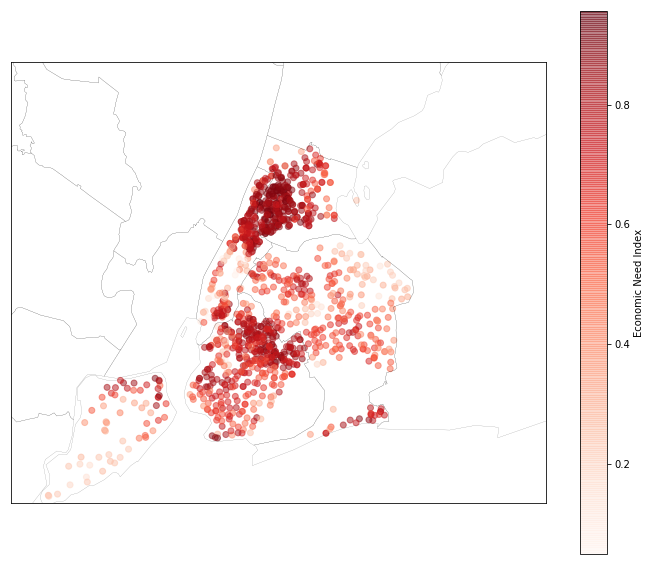

In [149]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='tmerc', resolution='l', 
            llcrnrlat=40.5,llcrnrlon=-74.3,urcrnrlat=41,urcrnrlon=-73.5,lat_0=lat_0,lon_0=lon_0)
#m.shadedrelief()
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcounties(color='black')

m.scatter(lons, lats, latlon=True,
          c=ENI,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'Economic Need Index')

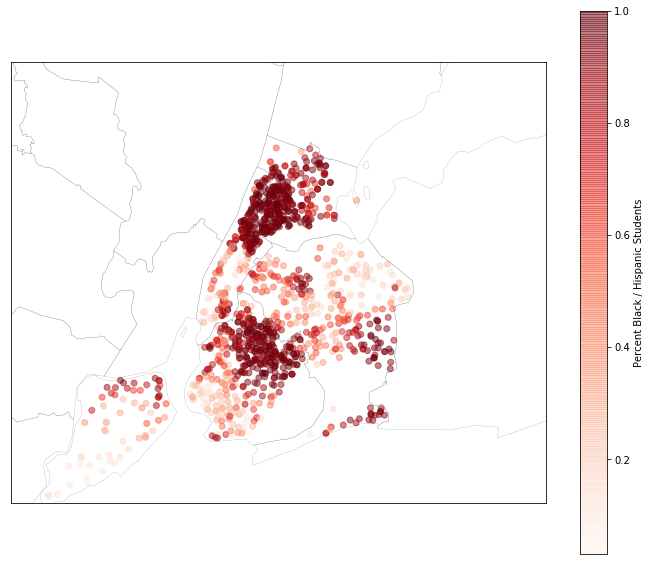

In [158]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='tmerc', resolution='l', 
            llcrnrlat=40.5,llcrnrlon=-74.3,urcrnrlat=41,urcrnrlon=-73.5,lat_0=lat_0,lon_0=lon_0)
#m.shadedrelief()
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcounties(color='black')

m.scatter(lons, lats, latlon=True,
          c=bl_hisp,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'Percent Black / Hispanic Students')

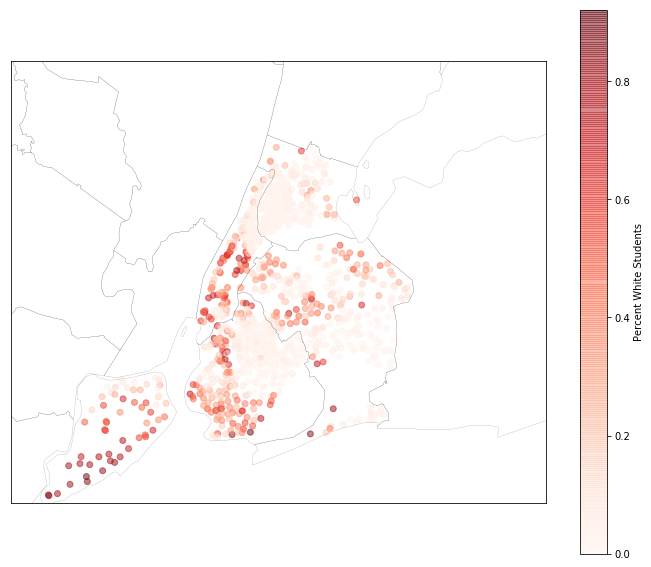

In [159]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='tmerc', resolution='l', 
            llcrnrlat=40.5,llcrnrlon=-74.3,urcrnrlat=41,urcrnrlon=-73.5,lat_0=lat_0,lon_0=lon_0)
#m.shadedrelief()
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcounties(color='black')

m.scatter(lons, lats, latlon=True,
          c=white,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'Percent White Students')

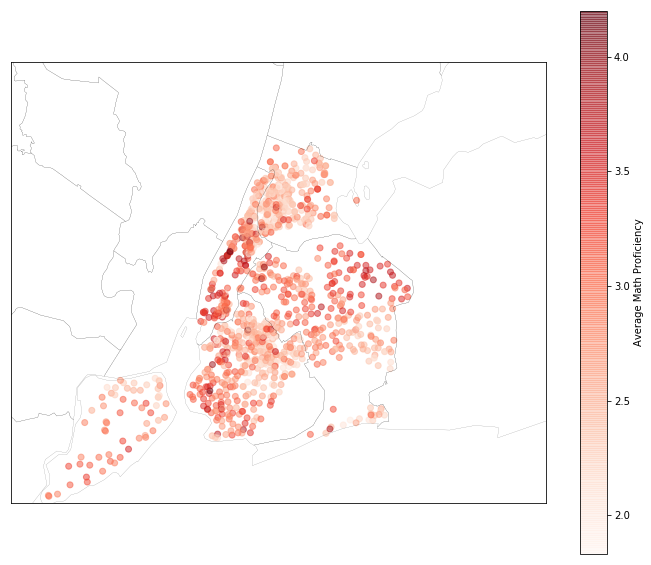

In [160]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='tmerc', resolution='l', 
            llcrnrlat=40.5,llcrnrlon=-74.3,urcrnrlat=41,urcrnrlon=-73.5,lat_0=lat_0,lon_0=lon_0)
#m.shadedrelief()
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcounties(color='black')

m.scatter(lons, lats, latlon=True,
          c=math_prof,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'Average Math Proficiency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f377bccd0>,
      dtype=object)

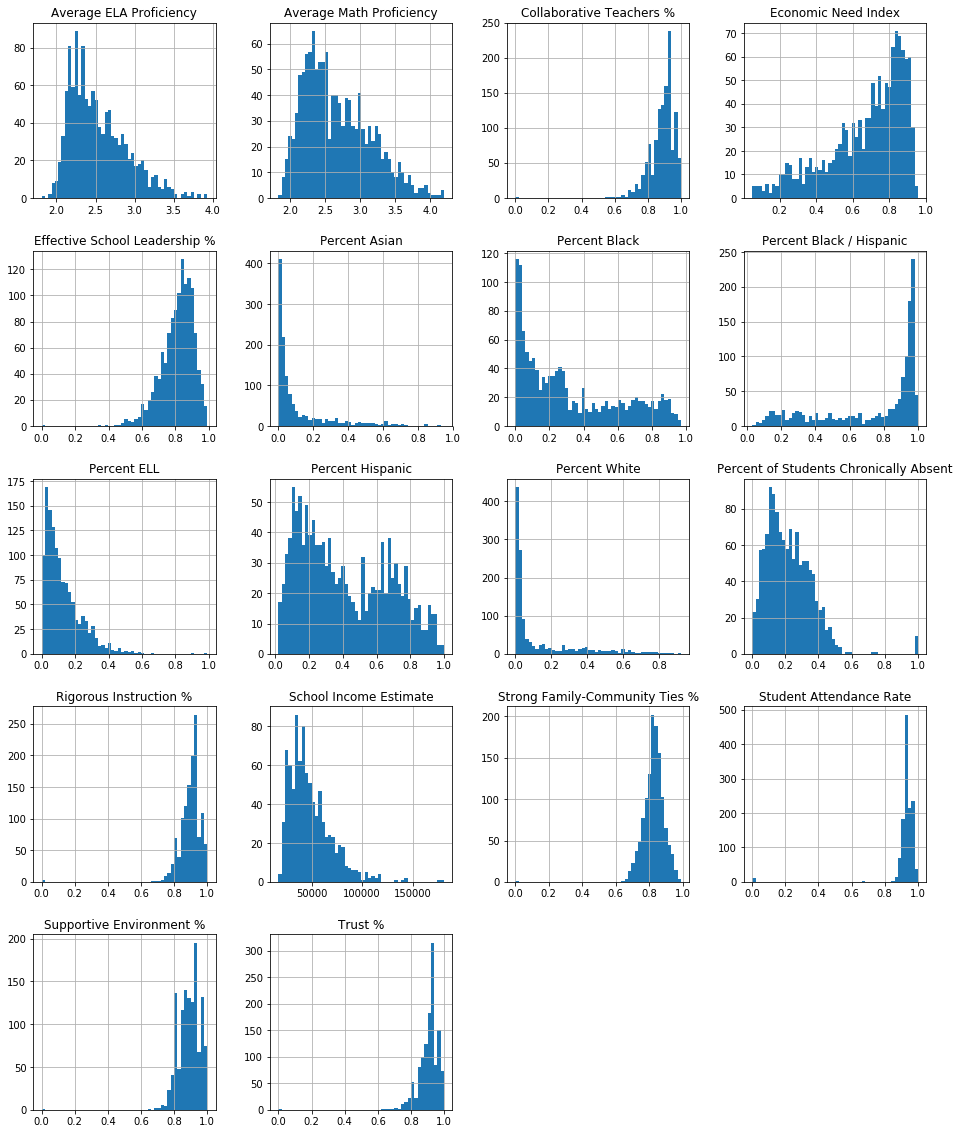

In [163]:
df_school.loc[:,'Economic Need Index':'Average Math Proficiency'].hist(figsize=(16,20),bins=50)

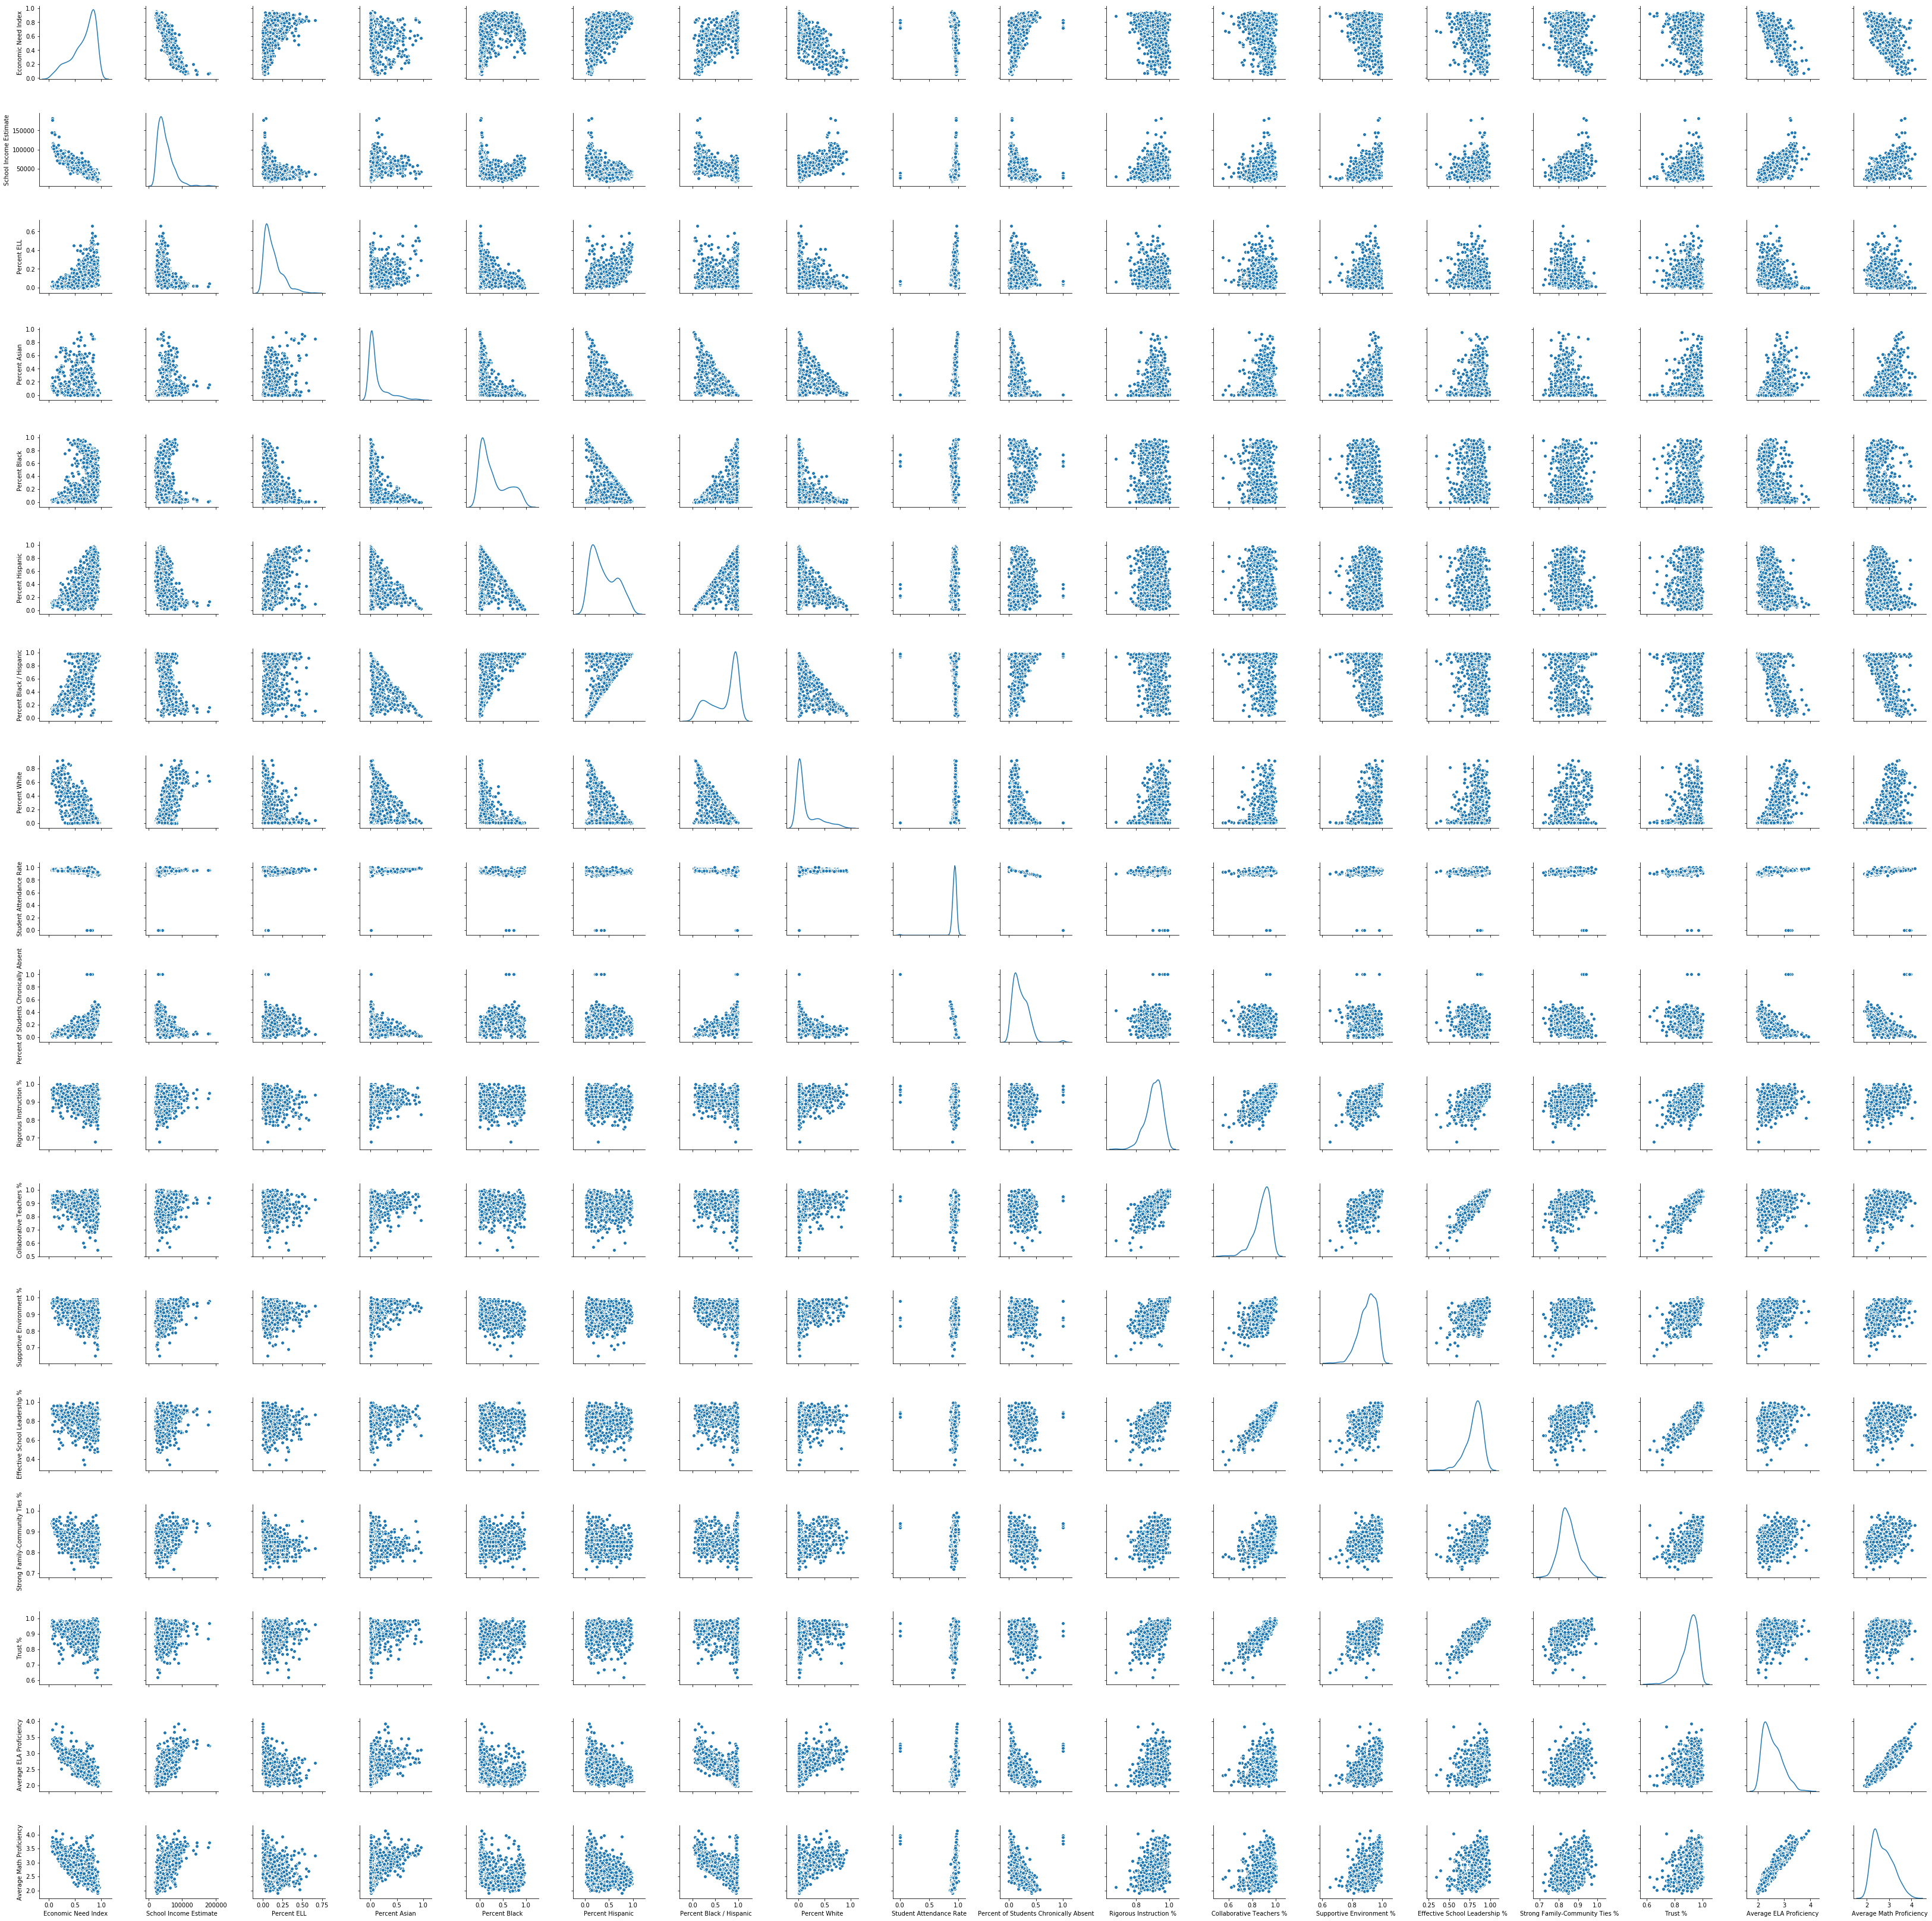

In [165]:
sns.pairplot(df_school.loc[:,'Economic Need Index':'Average Math Proficiency'].dropna(),diag_kind='kde')